Sprint 10

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab
from scipy.stats import shapiro
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import mysql.connector

In [ ]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='---',
    database='sprint10',
    auth_plugin='mysql_native_password'
)

cursor = conn.cursor()

ibex35_df = pd.read_sql(f"SELECT * FROM ibex35", conn)
spy_df = pd.read_sql(f"SELECT * FROM sp500", conn)

In [4]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=spy_df['Date'],
    open=spy_df['Open'],
    high=spy_df['High'],
    low=spy_df['Low'],
    close=spy_df['Close']
)])
fig.update_layout(title='Candlestick del SPY', xaxis_title='Fecha', yaxis_title='Valor')
fig.show()

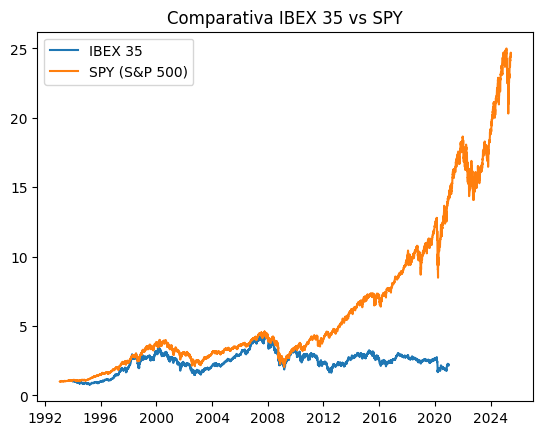

In [ ]:
ibex35_df['valor_norm'] = ibex35_df['Close'] / ibex35_df['Close'].iloc[0]
spy_df['valor_norm'] = spy_df['Close'] / spy_df['Close'].iloc[0]

plt.plot(ibex35_df['Date'], ibex35_df['valor_norm'], label='IBEX 35')
plt.plot(spy_df['Date'], spy_df['valor_norm'], label='SPY (S&P 500)')
plt.legend()
plt.title('Comparativa IBEX 35 vs SPY')
plt.show()

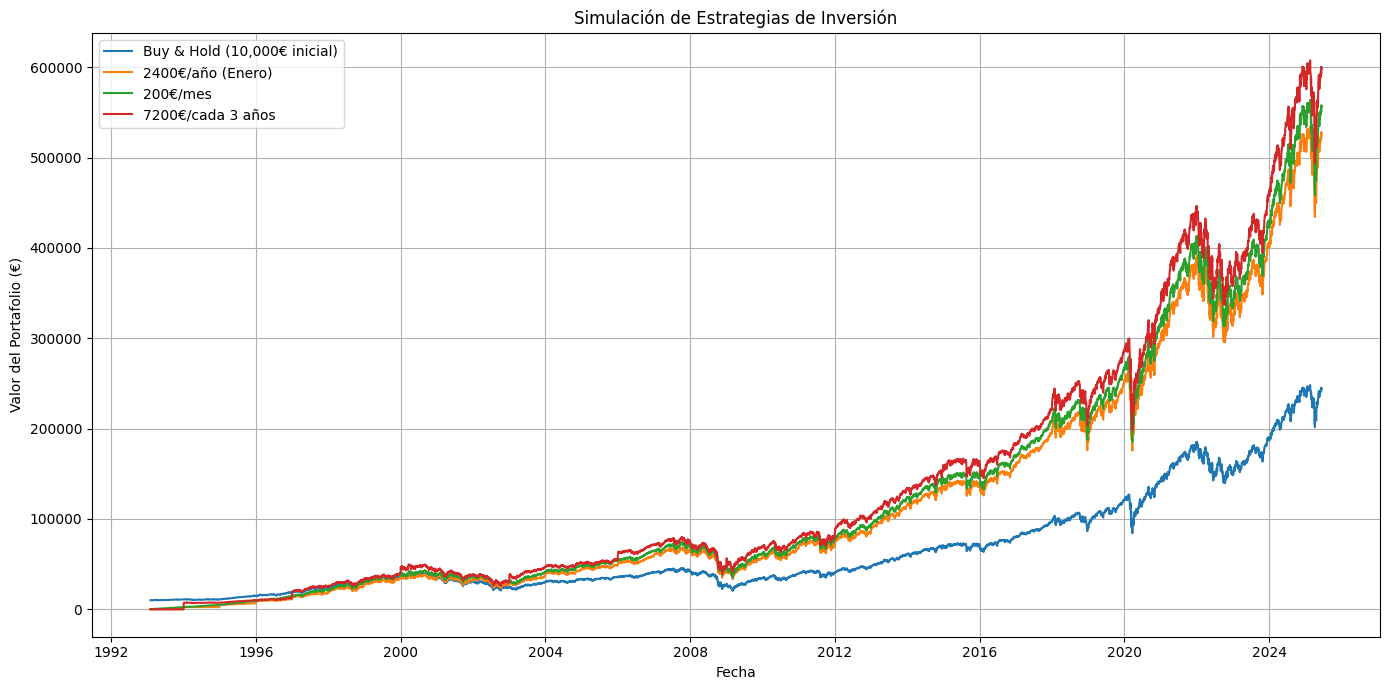

In [ ]:
spy_df["Date"] = pd.to_datetime(spy_df["Date"])
spy_df = spy_df.sort_values("Date").reset_index(drop=True)

# Buy & Hold
initial_investment = 10000
first_price = spy_df["Close"].iloc[0]
shares_hold = initial_investment / first_price
spy_df["BuyHold_Value"] = shares_hold * spy_df["Close"]

# --- Estrategia cada 3 años ---
triennial_investment = 7200
triennial_shares = 0
triennial_portfolio = []

last_invested_year = None

for i, row in spy_df.iterrows():
    date = row["Date"]
    price = row["Close"]
    year = date.year

    if (date.month == 1) and (date.day <= 5):
        if last_invested_year is None or (year - last_invested_year) >= 3:
            triennial_shares += triennial_investment / price
            last_invested_year = year

    triennial_portfolio.append(triennial_shares * price)

spy_df["Triennial_Value"] = triennial_portfolio

# --- Estrategia Anual ---
annual_investment = 2400
annual_shares = 0
annual_portfolio = []

for i, row in spy_df.iterrows():
    date = row["Date"]
    price = row["Close"]

    if (date.month == 1) and (date.day <= 5):
        if i == 0 or spy_df["Date"].iloc[i - 1].year < date.year:
            annual_shares += annual_investment / price

    annual_portfolio.append(annual_shares * price)

spy_df["Annual_Value"] = annual_portfolio

# --- Estrategia Mensual ---
monthly_investment = 200
monthly_shares = 0
monthly_portfolio = []
last_month = -1

for i, row in spy_df.iterrows():
    date = row["Date"]
    price = row["Close"]

    if date.month != last_month:
        monthly_shares += monthly_investment / price
        last_month = date.month

    monthly_portfolio.append(monthly_shares * price)

spy_df["Monthly_Value"] = monthly_portfolio

plt.figure(figsize=(14, 7))
plt.plot(spy_df["Date"], spy_df["BuyHold_Value"], label="Buy & Hold (10,000€ inicial)")
plt.plot(spy_df["Date"], spy_df["Annual_Value"], label="2400€/año (Enero)")
plt.plot(spy_df["Date"], spy_df["Monthly_Value"], label="200€/mes")
plt.plot(spy_df["Date"], spy_df["Triennial_Value"], label="7200€/cada 3 años")
plt.title("Simulación de Estrategias de Inversión")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_16464\2194247249.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



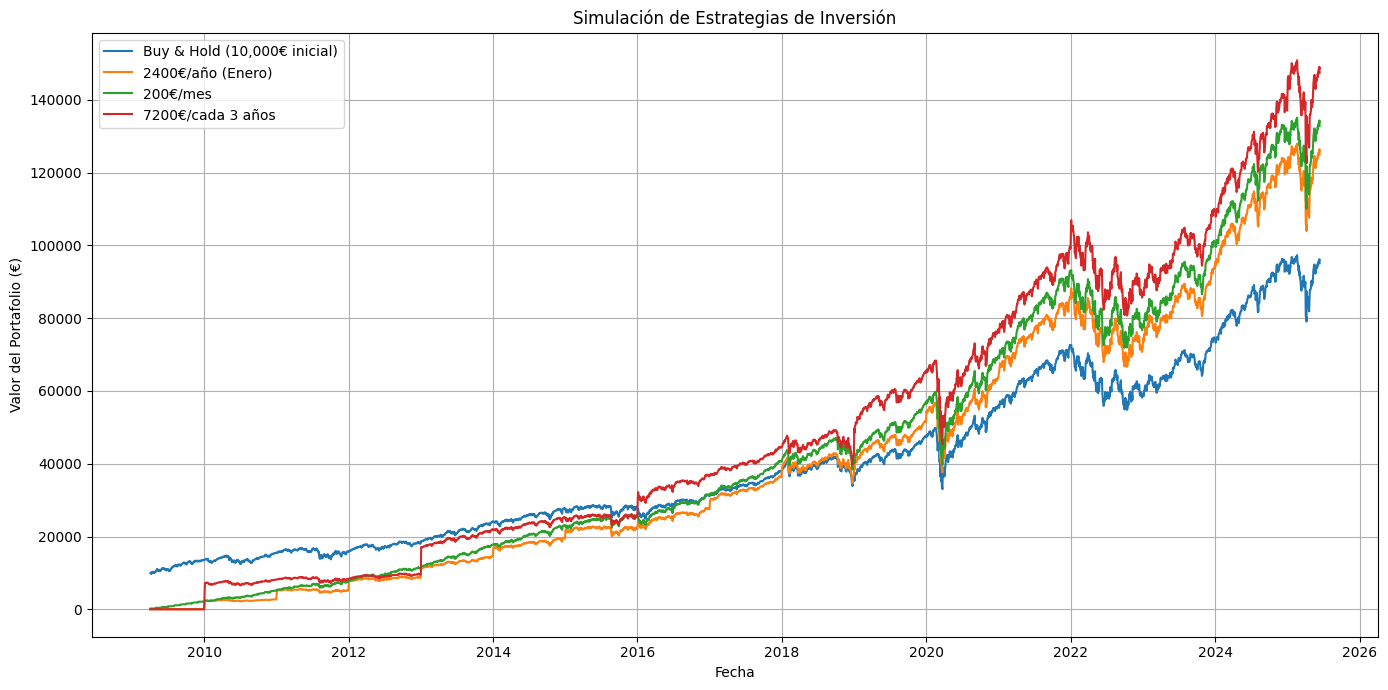

In [ ]:
second_half = spy_df.iloc[len(spy_df)//2:]
second_half["Date"] = pd.to_datetime(second_half["Date"])
second_half = second_half.sort_values("Date").reset_index(drop=True)

# Buy & Hold
initial_investment = 10000
first_price = second_half["Close"].iloc[0]
shares_hold = initial_investment / first_price
second_half["BuyHold_Value"] = shares_hold * second_half["Close"]

# --- Estrategia cada 3 años ---
triennial_investment = 7200
triennial_shares = 0
triennial_portfolio = []

last_invested_year = None

for i, row in second_half.iterrows():
    date = row["Date"]
    price = row["Close"]
    year = date.year

    if (date.month == 1) and (date.day <= 5):
        if last_invested_year is None or (year - last_invested_year) >= 3:
            triennial_shares += triennial_investment / price
            last_invested_year = year

    triennial_portfolio.append(triennial_shares * price)

second_half["Triennial_Value"] = triennial_portfolio

# --- Estrategia Anual ---
annual_investment = 2400
annual_shares = 0
annual_portfolio = []

for i, row in second_half.iterrows():
    date = row["Date"]
    price = row["Close"]

    if (date.month == 1) and (date.day <= 5):
        if i == 0 or second_half["Date"].iloc[i - 1].year < date.year:
            annual_shares += annual_investment / price

    annual_portfolio.append(annual_shares * price)

second_half["Annual_Value"] = annual_portfolio

# --- Estrategia Mensual ---
monthly_investment = 200
monthly_shares = 0
monthly_portfolio = []
last_month = -1

for i, row in second_half.iterrows():
    date = row["Date"]
    price = row["Close"]

    if date.month != last_month:
        monthly_shares += monthly_investment / price
        last_month = date.month

    monthly_portfolio.append(monthly_shares * price)

second_half["Monthly_Value"] = monthly_portfolio

# --- Visualización ---
plt.figure(figsize=(14, 7))
plt.plot(second_half["Date"], second_half["BuyHold_Value"], label="Buy & Hold (10,000€ inicial)")
plt.plot(second_half["Date"], second_half["Annual_Value"], label="2400€/año (Enero)")
plt.plot(second_half["Date"], second_half["Monthly_Value"], label="200€/mes")
plt.plot(second_half["Date"], second_half["Triennial_Value"], label="7200€/cada 3 años")
plt.title("Simulación de Estrategias de Inversión")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
spy_df

data = [spy_df["Open"],spy_df["High"],spy_df["Low"],spy_df["Close"],spy_df["Volume"]]
for x in data:
    stat, p = shapiro(x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(f"Probably Gaussian {x.name}")
    else:
        print(f"Probably not Gaussian {x.name}")

#Los datos son normales.

stat=0.956, p=0.000
Probably not Gaussian Open
stat=0.955, p=0.000
Probably not Gaussian High
stat=0.958, p=0.000
Probably not Gaussian Low
stat=0.956, p=0.000
Probably not Gaussian Close
stat=0.775, p=0.000
Probably not Gaussian Volume


C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_17536\4214508269.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  spy_df = pd.read_sql(f"SELECT * FROM sp500", conn)


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.68      0.55       744
           1       0.57      0.35      0.43       886

    accuracy                           0.50      1630
   macro avg       0.52      0.51      0.49      1630
weighted avg       0.52      0.50      0.49      1630


Confusion Matrix:
 [[508 236]
 [579 307]]
Target
1    0.515892
0    0.484108
Name: proportion, dtype: float64


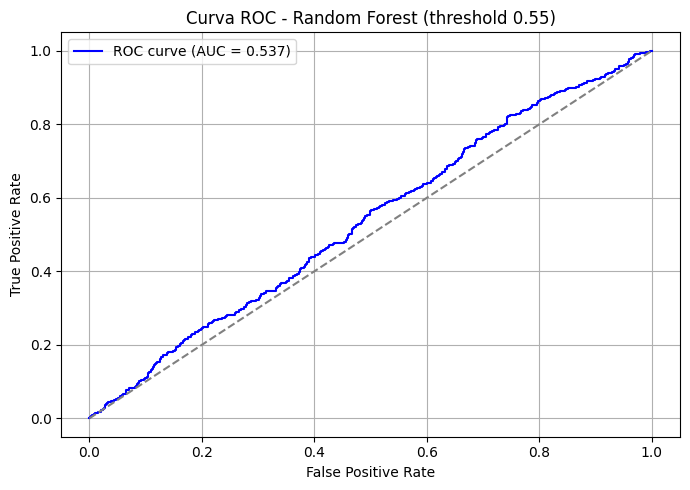

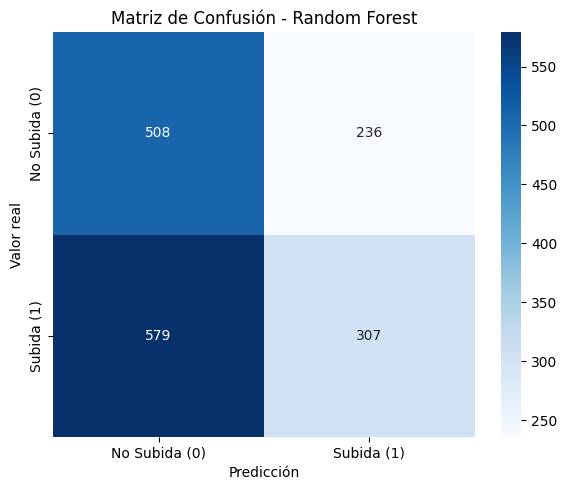

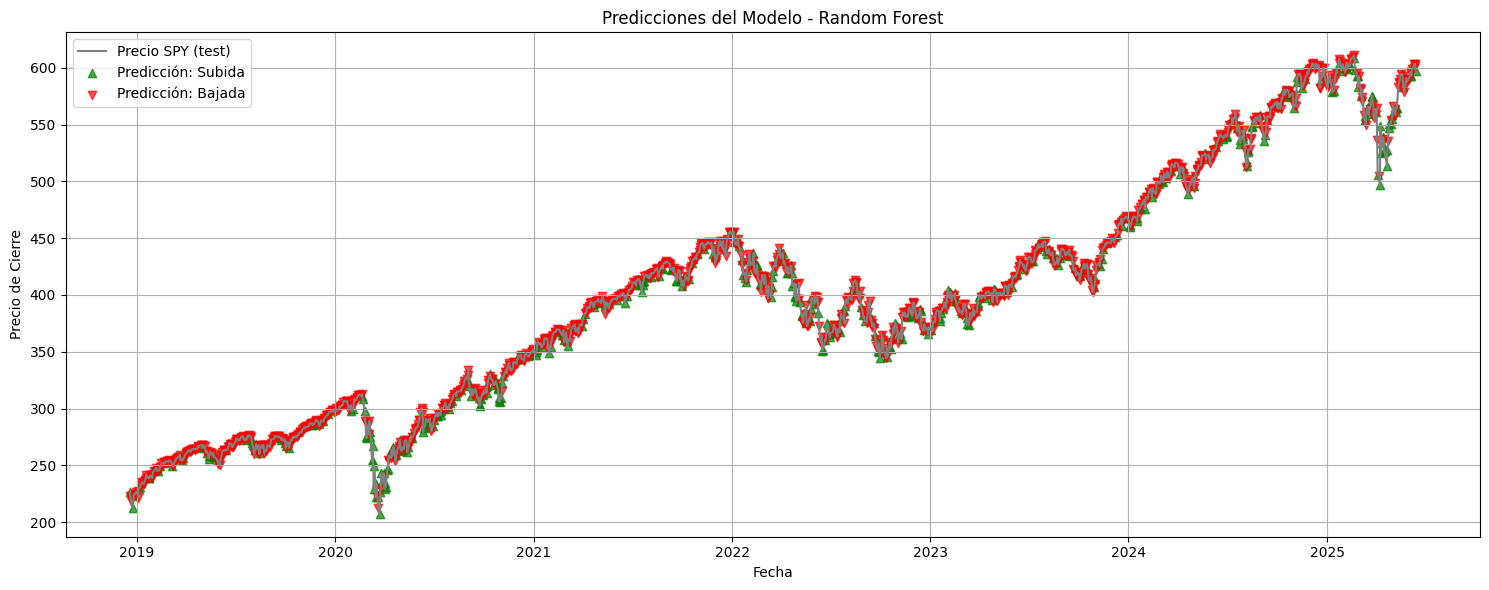

In [ ]:
spy_df = pd.read_sql(f"SELECT * FROM sp500", conn)
# Variables técnicas básicas
spy_df["Return_1d"] = spy_df["Close"].pct_change(1) #Qué tanto ha subido respecto al dia anterior (porcentual)
spy_df["Volume_Change"] = spy_df["Volume"].pct_change(1) #Cambio porcentual del dia anterior (en volumen)
spy_df["High_Low_Spread"] = spy_df["High"] - spy_df["Low"] #Diferencia entre precio mas alto y mas bajo
spy_df["Target"] = (spy_df["Close"].shift(-3) > spy_df["Close"] * 1.002).astype(int) #En tres dias habrá subido un 2%?
spy_df = spy_df.dropna()

# Selección de variables
features = ["Return_1d", "Volume_Change", "High_Low_Spread"]
X = spy_df[features]
y = spy_df["Target"]

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Predicciones con umbral ajustado
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.55 #Mayor probabilidad de 55% de subir? Entonces = 1
y_pred = (y_proba > threshold).astype(int)

# Agregar predicción al dataframe
spy_df.loc[X_test.index, "Prediction"] = y_pred

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(spy_df["Target"].value_counts(normalize=True))
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest (threshold 0.55)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
labels = ["No Subida (0)", "Subida (1)"]
plt.figure(figsize=(6, 5))
seab.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
spy_test = spy_df.loc[X_test.index]
plt.plot(spy_test["Date"], spy_test["Close"], color="gray", label="Precio SPY (test)")
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 1, "Date"],
    spy_test.loc[spy_test["Prediction"] == 1, "Close"],
    color="green", marker="^", label="Predicción: Subida", alpha=0.7
)
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 0, "Date"],
    spy_test.loc[spy_test["Prediction"] == 0, "Close"],
    color="red", marker="v", label="Predicción: Bajada", alpha=0.7
)
plt.title("Predicciones del Modelo - Random Forest")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importances = model.feature_importances_

Accuracy: 0.4865030674846626

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.73      0.57       744
           1       0.55      0.28      0.37       886

    accuracy                           0.49      1630
   macro avg       0.51      0.51      0.47      1630
weighted avg       0.51      0.49      0.46      1630


Confusion Matrix:
 [[544 200]
 [637 249]]

Distribución real de clases:
 Target
1    0.515892
0    0.484108
Name: proportion, dtype: float64


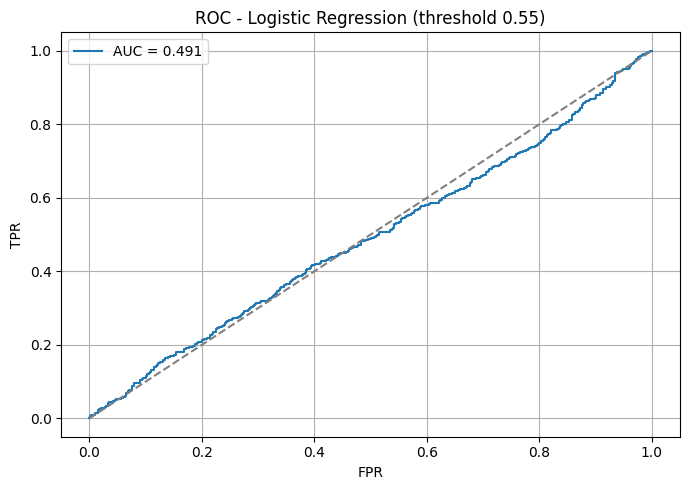

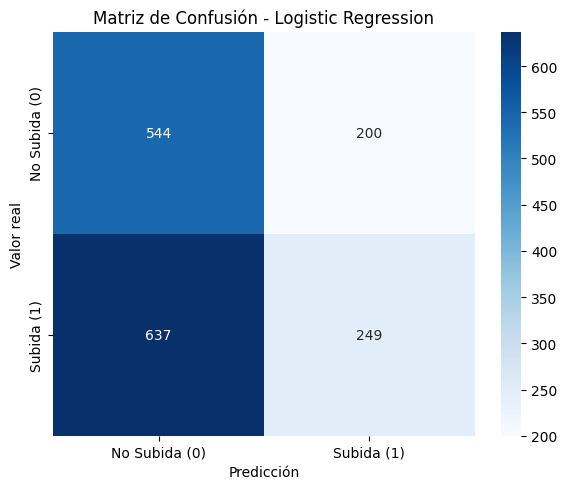

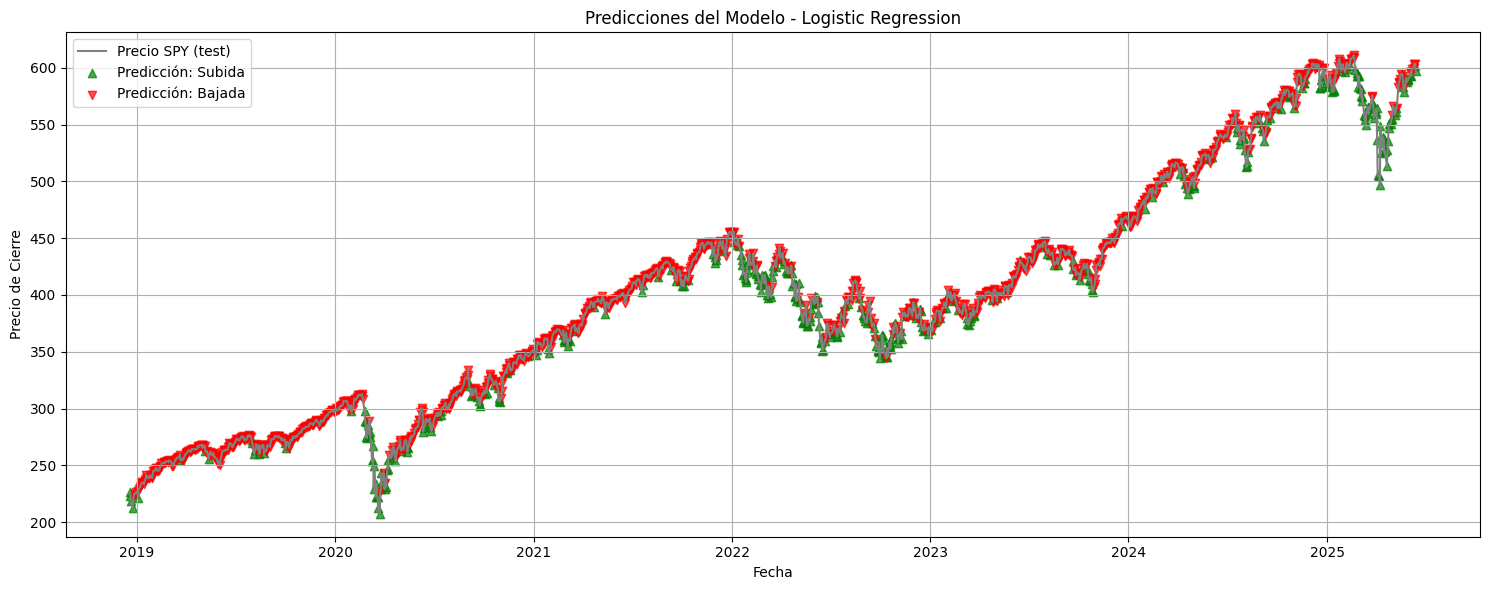

In [34]:
features = ["Return_1d", "Volume_Change", "High_Low_Spread"]
X_unscaled = spy_df[features]
y = spy_df["Target"]

# Escalado
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_unscaled)
X_scaled = pd.DataFrame(X_scaled_array, columns=features, index=X_unscaled.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)
test_indices = X_test.index

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred = (y_proba > threshold).astype(int)
spy_df.loc[test_indices, "Prediction"] = y_pred

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDistribución real de clases:\n", spy_df["Target"].value_counts(normalize=True))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC - Logistic Regression (threshold 0.55)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
labels = ["No Subida (0)", "Subida (1)"]
plt.figure(figsize=(6, 5))
seab.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Logistic Regression")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
spy_test = spy_df.loc[X_test.index]
plt.plot(spy_test["Date"], spy_test["Close"], color="gray", label="Precio SPY (test)")
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 1, "Date"],
    spy_test.loc[spy_test["Prediction"] == 1, "Close"],
    color="green", marker="^", label="Predicción: Subida", alpha=0.7
)
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 0, "Date"],
    spy_test.loc[spy_test["Prediction"] == 0, "Close"],
    color="red", marker="v", label="Predicción: Bajada", alpha=0.7
)
plt.title("Predicciones del Modelo - Logistic Regression")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.4950920245398773

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.77      0.58       744
           1       0.58      0.27      0.37       886

    accuracy                           0.50      1630
   macro avg       0.52      0.52      0.47      1630
weighted avg       0.53      0.50      0.46      1630


Confusion Matrix:
 [[570 174]
 [649 237]]
Target
1    0.515892
0    0.484108
Name: proportion, dtype: float64


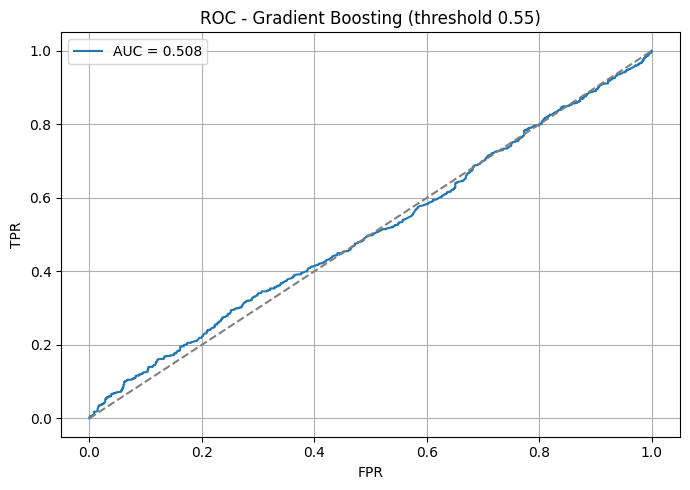

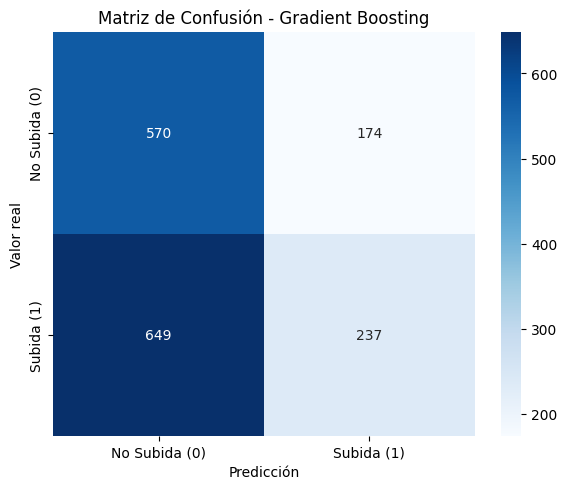

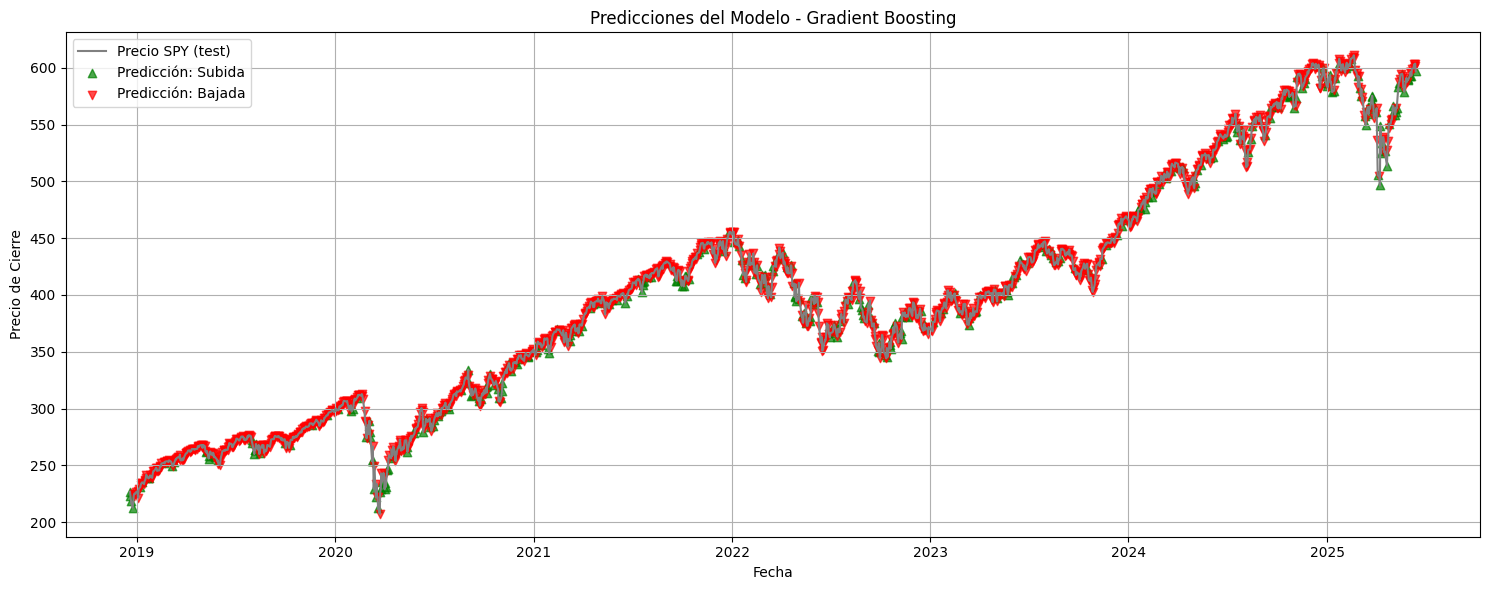

In [33]:
features = ["Return_1d", "Volume_Change", "High_Low_Spread"]
X = spy_df[features]
y = spy_df["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred = (y_proba > threshold).astype(int)
spy_df.loc[X_test.index, "Prediction"] = y_pred

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(spy_df["Target"].value_counts(normalize=True))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC - Gradient Boosting (threshold 0.55)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
labels = ["No Subida (0)", "Subida (1)"]
plt.figure(figsize=(6, 5))
seab.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
spy_test = spy_df.loc[X_test.index]
plt.plot(spy_test["Date"], spy_test["Close"], color="gray", label="Precio SPY (test)")
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 1, "Date"],
    spy_test.loc[spy_test["Prediction"] == 1, "Close"],
    color="green", marker="^", label="Predicción: Subida", alpha=0.7
)
plt.scatter(
    spy_test.loc[spy_test["Prediction"] == 0, "Date"],
    spy_test.loc[spy_test["Prediction"] == 0, "Close"],
    color="red", marker="v", label="Predicción: Bajada", alpha=0.7
)
plt.title("Predicciones del Modelo - Gradient Boosting")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

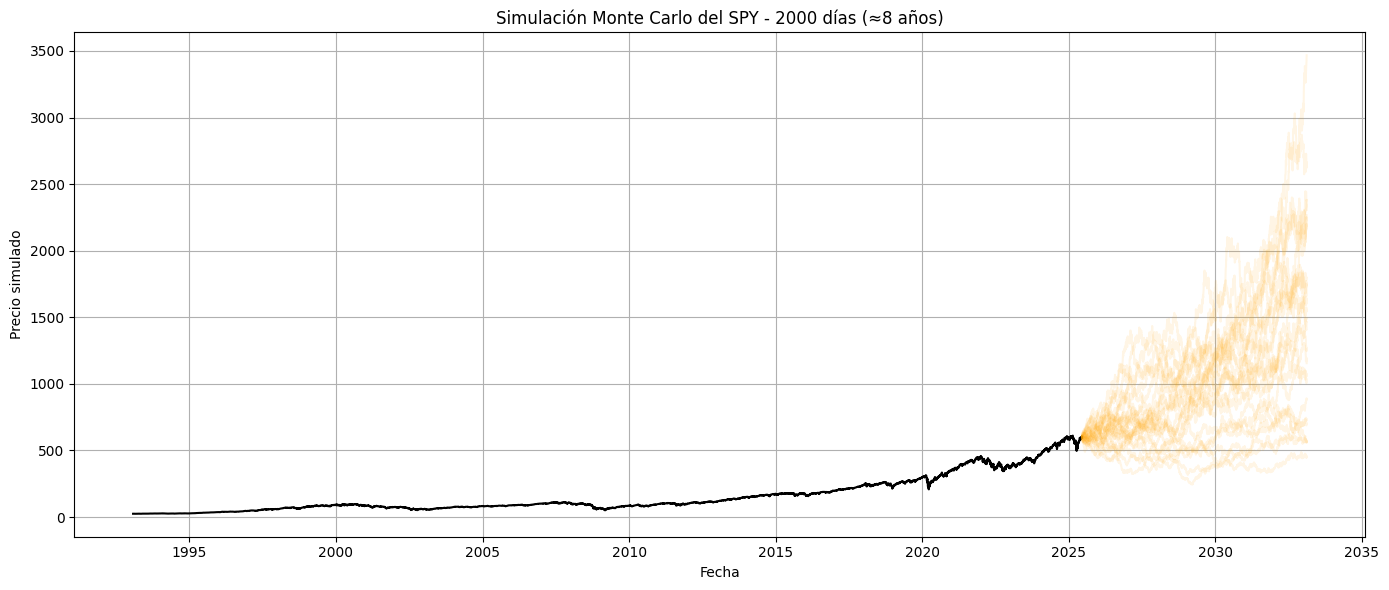

In [ ]:
spy_df["Date"] = pd.to_datetime(spy_df["Date"])
spy_df["LogRet"] = np.log(spy_df["Close"] / spy_df["Close"].shift(1)) #Retorno logarítmico
mediaDiaria = spy_df["LogRet"].mean()       # media diaria
sigma = spy_df["LogRet"].std()     # desviación estándar diaria

n_simulaciones = 25  
n_dias = 2000  
ultimo_precio = spy_df["Close"].iloc[-1]
simulaciones = np.zeros((n_dias, n_simulaciones))

for i in range(n_simulaciones):
    random_returns = np.random.normal(loc=mediaDiaria, scale=sigma, size=n_dias)
    precios = [ultimo_precio]
    for ret in random_returns:
        precios.append(precios[-1] * np.exp(ret))
    simulaciones[:, i] = precios[1:]

plt.figure(figsize=(14, 6))
plt.plot(spy_df["Date"], spy_df["Close"], label="SPY real", color="black")

fecha_inicio = spy_df["Date"].iloc[-1]
fechas_futuras = pd.date_range(start=fecha_inicio, periods=n_dias + 1, freq="B")[1:]

for i in range(n_simulaciones):
    plt.plot(fechas_futuras, simulaciones[:, i], color="orange", alpha=0.1)

plt.title("Simulación Monte Carlo del SPY - 2000 días (≈8 años)")
plt.xlabel("Fecha")
plt.ylabel("Precio simulado")
plt.grid(True)
plt.tight_layout()
plt.show()

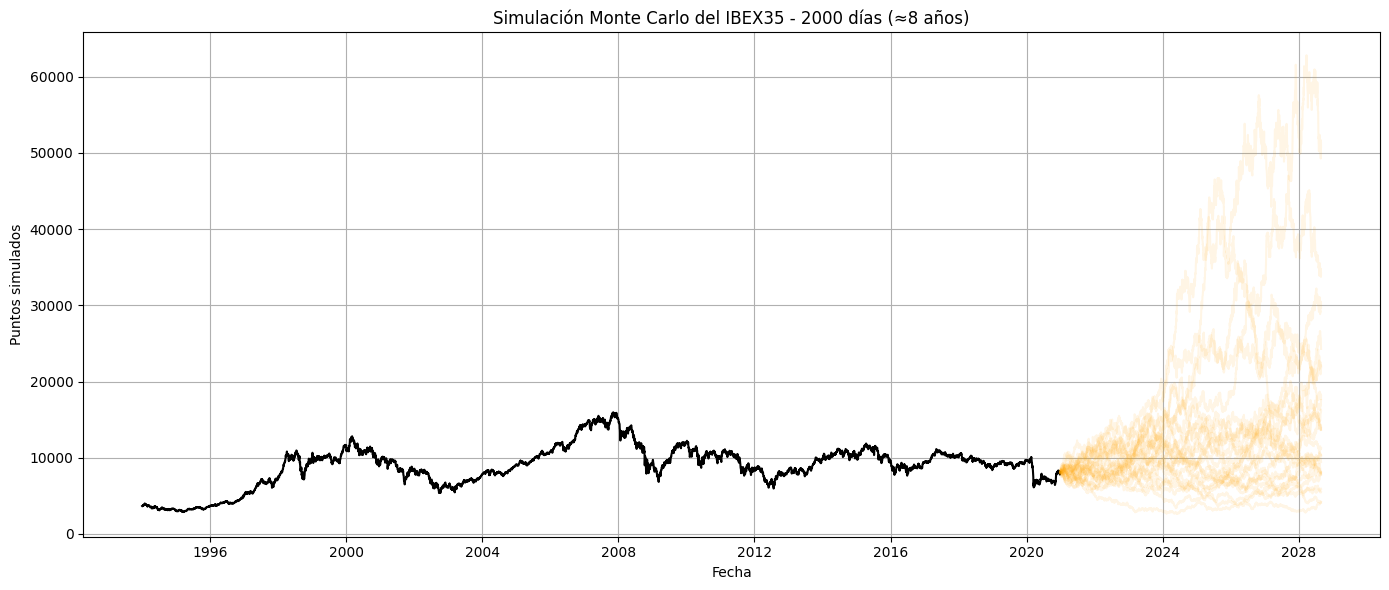

In [22]:
ibex35_df["Date"] = pd.to_datetime(ibex35_df["Date"])
ibex35_df["LogRet"] = np.log(ibex35_df["Close"] / ibex35_df["Close"].shift(1))
mu = ibex35_df["LogRet"].mean()
sigma = ibex35_df["LogRet"].std()

n_simulaciones = 25         
n_dias = 2000          

ultimo_precio = ibex35_df["Close"].iloc[-1]
simulaciones = np.zeros((n_dias, n_simulaciones))

for i in range(n_simulaciones):
    random_returns = np.random.normal(loc=mu, scale=sigma, size=n_dias)
    precios = [ultimo_precio]
    for ret in random_returns:
        precios.append(precios[-1] * np.exp(ret))
    simulaciones[:, i] = precios[1:]

plt.figure(figsize=(14, 6))
plt.plot(ibex35_df["Date"], ibex35_df["Close"], label="SPY real", color="black")

fecha_inicio = ibex35_df["Date"].iloc[-1]
fechas_futuras = pd.date_range(start=fecha_inicio, periods=n_dias + 1, freq="B")[1:]

for i in range(n_simulaciones):
    plt.plot(fechas_futuras, simulaciones[:, i], color="orange", alpha=0.1)

plt.title("Simulación Monte Carlo del IBEX35 - 2000 días (≈8 años)")
plt.xlabel("Fecha")
plt.ylabel("Puntos simulados")
plt.grid(True)
plt.tight_layout()
plt.show()